## Аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, 
в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, 
чтобы приблизить сложную зависимость с помощью функции из определенного семейства. 
В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 
различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей 
системы линейных уравнений:


<img src='data/SLHK79HnEeWvxwo5BbZD3w_ed4fb0020ad6ccb0b2e2ea50468b7789_lineqn.png'>


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), 
f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени,
который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. 
Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. 
Улучшилось ли качество аппроксимации?

Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. 
Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) 
являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака.


In [1]:
import math
import numpy as np
from typing import Tuple, List
import scipy.linalg as lg
from matplotlib import pylab as plt

def input_func(x: float) -> float:
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

def get_linear_equation_system(points: List[float]):
    a = []
    b = []
    for x in points:
        a.append([x ** deg for deg in range(len(points))])
        b.append(input_func(x))

    return a, b

def solve(points: List[float]) -> List[float]:
    (a, b) = get_linear_equation_system(points)
    return lg.solve(a, b)

def polynom(points: List[float], x):
    c = solve(points)
    print(c)
    
    ans = np.zeros(len(x))
    for deg in range(len(c)):
        ans += c[deg] * x ** deg
    return ans

In [2]:
%matplotlib inline
x = np.arange(0, 16, 0.1)

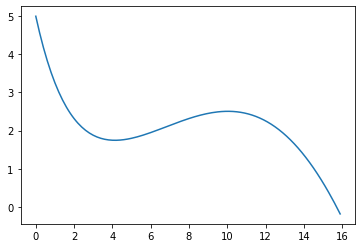

In [3]:
vec_input_func = np.vectorize(input_func)
y = vec_input_func(x)
plt.plot(x, y)
plt.show()

[ 3.43914511 -0.18692825]


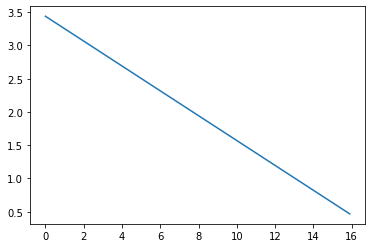

In [4]:
y = polynom([1, 15], x)
plt.plot(x, y)
plt.show()

[ 3.32512949 -0.06531159 -0.00760104]


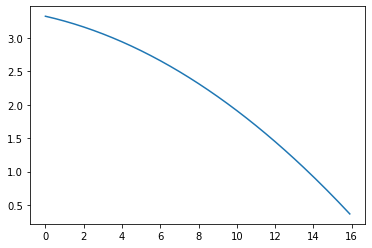

In [5]:
y = polynom([1, 8, 15], x)
plt.plot(x, y)
plt.show()

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


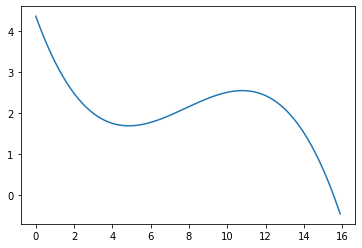

In [6]:
y = polynom([1, 4, 10, 15], x)
plt.plot(x, y)
plt.show()

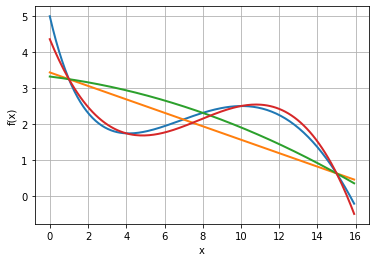

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
 
from itertools import cycle
from functools import partial
from mpmath import mp
 
       
# mp.dps = 25
# mp.pretty = False
 
 
 
def f(x, ctx=math):
    return ctx.sin(x / 5) * ctx.exp(x / 10) + 5 * ctx.exp(-x / 2)
 
def approx_f(x, ws):
    return sum(x**i * w for i, w in enumerate(ws))
 
def a_matrix(xs, *, matrix=lambda x: x):
    return matrix([[x**n for n in range(len(xs))] for x in xs])
 
def b_matrix(xs, f, *, matrix=lambda x: x):
    return matrix([f(x) for x in xs])
 
def plot(fs, xlim, points=200):
    a, b = xlim
    colors = cycle(['b', 'r', 'g', 'm', 'k'])
    fig, ax = plt.subplots()
    xs = np.arange(a, b, (b-a)/points)
    for f, clr in zip(fs, colors):
        ys = [f(x) for x in xs]
        ax.plot(xs, ys, linewidth=2)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True)
    plt.show()

xpoints = [
    (1, 15),
    (1, 8, 15),
    (1, 4, 10, 15),
]
 
fs = [f]
for xs in xpoints:
    a = a_matrix(xs)
    b = b_matrix(xs, f)
    # ws = mp.lu_solve(a, b)
    # ws = scipy.linalg.solve(a, b)
    ws = np.linalg.solve(a,b)
    tf = partial(approx_f, ws=ws)
    fs.append(tf)

# mp.plot(fs, (0, 16))
plot(fs, (0, 16))

ws